In [1]:
import os
import shutil
import zipfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# Descomprime la base de datos

local_zip = "C:/Users/ferga/Documents/Python/hojas/WeedCountImages_v1.zip"

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('')
zip_ref.close()

In [2]:
# Cuenta el número de imágenes que hay por cada categoría

imag_1_hoja = 0
imag_2_hojas = 0
imag_3_hojas = 0
imag_4_hojas = 0
imag_5_6_hojas = 0
imag_7_plus_hojas = 0
dir1 = "C:/Users/ferga/Documents/Python/hojas/1"
dir2 = "C:/Users/ferga/Documents/Python/hojas/2"
dir3 = "C:/Users/ferga/Documents/Python/hojas/3"
dir4 = "C:/Users/ferga/Documents/Python/hojas/4"
dir5_6 = "C:/Users/ferga/Documents/Python/hojas/5-6"
dir7plus = "C:/Users/ferga/Documents/Python/hojas/7+"
for path in os.listdir(dir1):
    if os.path.isfile(os.path.join(dir1, path)):
        imag_1_hoja += 1
for path in os.listdir(dir2):
    if os.path.isfile(os.path.join(dir2, path)):
        imag_2_hojas += 1
for path in os.listdir(dir3):
    if os.path.isfile(os.path.join(dir3, path)):
        imag_3_hojas += 1
for path in os.listdir(dir4):
    if os.path.isfile(os.path.join(dir4, path)):
        imag_4_hojas += 1
for path in os.listdir(dir5_6):
    if os.path.isfile(os.path.join(dir5_6, path)):
        imag_5_6_hojas += 1
for path in os.listdir(dir7plus):
    if os.path.isfile(os.path.join(dir7plus, path)):
        imag_7_plus_hojas += 1
print('Imagenes de 1 hoja: '+ str(imag_1_hoja))
print('Imagenes de 2 hojas: '+ str(imag_2_hojas))
print('Imagenes de 3 hojas: '+ str(imag_3_hojas))
print('Imagenes de 4 hojas: '+ str(imag_4_hojas))
print('Imagenes de 5-6 hojas: '+ str(imag_5_6_hojas))
print('Imagenes de 7 o más hojas: ' + str(imag_7_plus_hojas))
print('Total: ', imag_1_hoja+imag_2_hojas+imag_3_hojas+imag_4_hojas+imag_5_6_hojas+imag_7_plus_hojas)


Imagenes de 1 hoja: 617
Imagenes de 2 hojas: 2940
Imagenes de 3 hojas: 615
Imagenes de 4 hojas: 786
Imagenes de 5-6 hojas: 969
Imagenes de 7 o más hojas: 676
Total:  6603


In [5]:
# Numero a trabajar de imagenes
imag_1_hoja = 615
imag_2_hojas = 615
imag_3_hojas = 615
imag_4_hojas = 615
imag_5_6_hojas = 615
imag_7plus_hojas = 615

In [6]:
#Cuenta cuantas imágenes servirán para train, para validation y para test, en este caso se ha seguido el criterio 80%-10%-10% respectivamente.

n_imag_train_1 = round(imag_1_hoja*0.8)
n_imag_validation_1 = imag_1_hoja//10
n_imag_test_1 = imag_1_hoja-n_imag_train_1-n_imag_validation_1
print('1 hoja: Train=' + str(n_imag_train_1) + ' Validation=' + str(n_imag_validation_1) + ' Test=' + str(n_imag_test_1))
n_imag_train_2 = round(imag_2_hojas*0.8)
n_imag_validation_2 = imag_2_hojas//10
n_imag_test_2 = imag_2_hojas-n_imag_train_2-n_imag_validation_2
print('2 hojas: Train=' + str(n_imag_train_2) + ' Validation=' + str(n_imag_validation_2) + ' Test=' + str(n_imag_test_2))
n_imag_train_3 = round(imag_3_hojas*0.8)
n_imag_validation_3 = imag_3_hojas//10
n_imag_test_3 = imag_3_hojas-n_imag_train_3-n_imag_validation_3
print('3 hojas: Train=' + str(n_imag_train_3) + ' Validation=' + str(n_imag_validation_3) + ' Test=' + str(n_imag_test_3))
n_imag_train_4 = round(imag_4_hojas*0.8)
n_imag_validation_4 = imag_4_hojas//10
n_imag_test_4 = imag_4_hojas-n_imag_train_4-n_imag_validation_4
print('4 hojas: Train=' + str(n_imag_train_4) + ' Validation=' + str(n_imag_validation_4) + ' Test=' + str(n_imag_test_4))
n_imag_train_5_6 = round(imag_5_6_hojas*0.8)
n_imag_validation_5_6 =imag_5_6_hojas//10
n_imag_test_5_6 = imag_5_6_hojas-n_imag_train_5_6-n_imag_validation_5_6
print('5-6 hojas: Train=' + str(n_imag_train_5_6) + ' Validation=' + str(n_imag_validation_5_6) + ' Test=' + str(n_imag_test_5_6))
n_imag_train_7plus = round(imag_7plus_hojas*0.8)
n_imag_validation_7plus = imag_7plus_hojas//10
n_imag_test_7plus = imag_7plus_hojas-n_imag_train_7plus-n_imag_validation_7plus
print('7 o más hojas: Train=' + str(n_imag_train_7plus) + ' Validation=' + str(n_imag_validation_7plus) + ' Test=' + str(n_imag_test_7plus))



1 hoja: Train=492 Validation=61 Test=62
2 hojas: Train=492 Validation=61 Test=62
3 hojas: Train=492 Validation=61 Test=62
4 hojas: Train=492 Validation=61 Test=62
5-6 hojas: Train=492 Validation=61 Test=62
7 o más hojas: Train=492 Validation=61 Test=62


In [7]:
#Asignamos cada ruta a variables que luego serán necesarias.

base_dir = "C:/Users/ferga/Documents/Python/hojas"

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

## Directorio con las imagenes de train
# 1 hoja.
train_weed1_dir = os.path.join(train_dir, '1')
# 2 hojas.
train_weed2_dir = os.path.join(train_dir, '2')
# 3 hojas.
train_weed3_dir = os.path.join(train_dir, '3')
# 4 hojas.
train_weed4_dir = os.path.join(train_dir, '4')
# 5-6 hojas.
train_weed_5_6_dir = os.path.join(train_dir, '5-6')
# 7 o más hojas.
train_weed_7plus_dir = os.path.join(train_dir, '7+')

## Directorio con las imagenes de validation
# 1 hoja
validation_weed1_dir = os.path.join(validation_dir, '1')
# 2 hojas
validation_weed2_dir = os.path.join(validation_dir, '2')
# 3 hojas.
validation_weed3_dir = os.path.join(validation_dir, '3')
# 4 hojas.
validation_weed4_dir = os.path.join(validation_dir, '4')
# 5-6 hojas.
validation_weed_5_6_dir = os.path.join(validation_dir, '5-6')
# 7 o más hojas.
validation_weed_7plus_dir = os.path.join(validation_dir, '7+')


## Directorio con las imagenes de test
# 1 hoja
test_weed1_dir = os.path.join(test_dir,'1')
# 2 hojas
test_weed2_dir = os.path.join(test_dir,'2')
# 3 hojas
test_weed3_dir = os.path.join(test_dir,'3')
# 4 hojas
test_weed4_dir = os.path.join(test_dir,'4')
# 5-6 hojas
test_weed_5_6_dir = os.path.join(test_dir,'5-6')
# 7 o más hojas
test_weed_7plus_dir = os.path.join(test_dir,'7+')


In [8]:
# Ordena cada foto en su respectiva carpeta de train, test o validation

# 1
i=0
while len(os.listdir(train_weed1_dir ) ) < n_imag_train_1:
    if os.path.isfile('hojas/1/'+str(i)+'.png'):
        shutil.copy('hojas/1/'+ str(i) +'.png','hojas/train/1/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(validation_weed1_dir ) ) < n_imag_validation_1:
    if os.path.isfile('hojas/1/'+str(i)+'.png'):
        shutil.copy('hojas/1/'+ str(i) +'.png','hojas/validation/1/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(test_weed1_dir ) ) < n_imag_test_1:
    if os.path.isfile('hojas/1/'+str(i)+'.png'):
        shutil.copy('hojas/1/'+ str(i) +'.png','hojas/test/1/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
# 2
i=0
while len(os.listdir(train_weed2_dir ) ) < n_imag_train_2:
    if os.path.isfile('hojas/2/'+str(i)+'.png'):
        shutil.copy('hojas/2/'+ str(i) +'.png','hojas/train/2/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(validation_weed2_dir ) ) < n_imag_validation_2:
    if os.path.isfile('hojas/2/'+str(i)+'.png'):
        shutil.copy('hojas/2/'+ str(i) +'.png','hojas/validation/2/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(test_weed2_dir ) ) < n_imag_test_2:
    if os.path.isfile('hojas/2/'+str(i)+'.png'):
        shutil.copy('hojas/2/'+ str(i) +'.png','hojas/test/2/'+ str(i)+'.png')
        i+=1
    else:
        i+=1

# 3
i=0
while len(os.listdir(train_weed3_dir ) ) < n_imag_train_3:
    if os.path.isfile('hojas/3/'+str(i)+'.png'):
        shutil.copy('hojas/3/'+ str(i) +'.png','hojas/train/3/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(validation_weed3_dir ) ) < n_imag_validation_3:
    if os.path.isfile('hojas/3/'+str(i)+'.png'):
        shutil.copy('hojas/3/'+ str(i) +'.png','hojas/validation/3/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(test_weed3_dir ) ) < n_imag_test_3:
    if os.path.isfile('hojas/3/'+str(i)+'.png'):
        shutil.copy('hojas/3/'+ str(i) +'.png','hojas/test/3/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
# 4
i=0
while len(os.listdir(train_weed4_dir ) ) < n_imag_train_4:
    if os.path.isfile('hojas/4/'+str(i)+'.png'):
        shutil.copy('hojas/4/'+ str(i) +'.png','hojas/train/4/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(validation_weed4_dir ) ) < n_imag_validation_4:
    if os.path.isfile('hojas/4/'+str(i)+'.png'):
        shutil.copy('hojas/4/'+ str(i) +'.png','hojas/validation/4/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(test_weed4_dir ) ) < n_imag_test_4:
    if os.path.isfile('hojas/4/'+str(i)+'.png'):
        shutil.copy('hojas/4/'+ str(i) +'.png','hojas/test/4/'+ str(i)+'.png')
        i+=1
    else:
        i+=1        
# 5-6
i=0
while len(os.listdir(train_weed_5_6_dir ) ) < n_imag_train_5_6:
    if os.path.isfile('hojas/5-6/'+str(i)+'.png'):
        shutil.copy('hojas/5-6/'+ str(i) +'.png','hojas/train/5-6/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(validation_weed_5_6_dir ) ) < n_imag_validation_5_6:
    if os.path.isfile('hojas/5-6/'+str(i)+'.png'):
        shutil.copy('hojas/5-6/'+ str(i) +'.png','hojas/validation/5-6/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(test_weed_5_6_dir ) ) < n_imag_test_5_6:
    if os.path.isfile('hojas/5-6/'+str(i)+'.png'):
        shutil.copy('hojas/5-6/'+ str(i) +'.png','hojas/test/5-6/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
# 7 o más
i=0
while len(os.listdir(train_weed_7plus_dir ) ) < n_imag_train_7plus:
    if os.path.isfile('hojas/7+/'+str(i)+'.png'):
        shutil.copy('hojas/7+/'+ str(i) +'.png','hojas/train/7+/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(validation_weed_7plus_dir ) ) < n_imag_validation_7plus:
    if os.path.isfile('hojas/7+/'+str(i)+'.png'):
        shutil.copy('hojas/7+/'+ str(i) +'.png','hojas/validation/7+/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(test_weed_7plus_dir ) ) < n_imag_test_7plus:
    if os.path.isfile('hojas/7+/'+str(i)+'.png'):
        shutil.copy('hojas/7+/'+ str(i) +'.png','hojas/test/7+/'+ str(i)+'.png')
        i+=1
    else:
        i+=1

In [9]:
# Pequeña comprobación de que las fotos están bien ordenadas

#Train
train_weed1_fnames = os.listdir( train_weed1_dir )
print(train_weed1_fnames[:5])
train_weed2_fnames = os.listdir( train_weed2_dir )
print(train_weed2_fnames[:5])
train_weed3_fnames = os.listdir( train_weed3_dir )
print(train_weed3_fnames[:5])
train_weed4_fnames = os.listdir( train_weed4_dir )
print(train_weed4_fnames[:5])
train_weed_5_6_fnames = os.listdir( train_weed_5_6_dir )
print(train_weed_5_6_fnames[:5])
train_weed_7plus_fnames = os.listdir( train_weed_7plus_dir )
print(train_weed_7plus_fnames[:5])

#Validation

#Test

['0.png', '1.png', '10.png', '100.png', '102.png']
['1.png', '10.png', '102.png', '103.png', '105.png']
['1.png', '10.png', '100.png', '101.png', '102.png']
['1.png', '10.png', '1002.png', '1005.png', '1006.png']
['1.png', '100.png', '101.png', '102.png', '104.png']
['0.png', '1.png', '100.png', '101.png', '102.png']


In [10]:
#Comprueba el numero de fotos que hay en cada directorio para verificar que se ha realizado el reparto correctamente

print('total training weed1 images :', len(os.listdir(train_weed1_dir ) ))
print('total training weed2 images :', len(os.listdir(train_weed2_dir ) ))
print('total training weed3 images :', len(os.listdir(train_weed3_dir ) ))
print('total training weed4 images :', len(os.listdir(train_weed4_dir ) ))
print('total training weed5-6 images :', len(os.listdir(train_weed_5_6_dir ) ))
print('total training weed7+ images :', len(os.listdir(train_weed_7plus_dir ) ))

print('total validation weed1 images :', len(os.listdir( validation_weed1_dir ) ))
print('total validation weed2 images :', len(os.listdir( validation_weed2_dir ) ))
print('total validation weed3 images :', len(os.listdir( validation_weed3_dir ) ))
print('total validation weed4 images :', len(os.listdir( validation_weed4_dir ) ))
print('total validation weed5-6 images :', len(os.listdir( validation_weed_5_6_dir ) ))
print('total validation weed7+ images :', len(os.listdir( validation_weed_7plus_dir ) ))

print('total test weed1 images :', len(os.listdir( test_weed1_dir ) ))
print('total test weed2 images :', len(os.listdir( test_weed2_dir ) ))
print('total test weed3 images :', len(os.listdir( test_weed3_dir ) ))
print('total test weed4 images :', len(os.listdir( test_weed4_dir ) ))
print('total test weed5-6 images :', len(os.listdir( test_weed_5_6_dir ) ))
print('total test weed7+ images :', len(os.listdir( test_weed_7plus_dir ) ))

total training weed1 images : 492
total training weed2 images : 492
total training weed3 images : 492
total training weed4 images : 492
total training weed5-6 images : 492
total training weed7+ images : 492
total validation weed1 images : 61
total validation weed2 images : 61
total validation weed3 images : 61
total validation weed4 images : 61
total validation weed5-6 images : 61
total validation weed7+ images : 61
total test weed1 images : 62
total test weed2 images : 62
total test weed3 images : 62
total test weed4 images : 62
total test weed5-6 images : 62
total test weed7+ images : 62


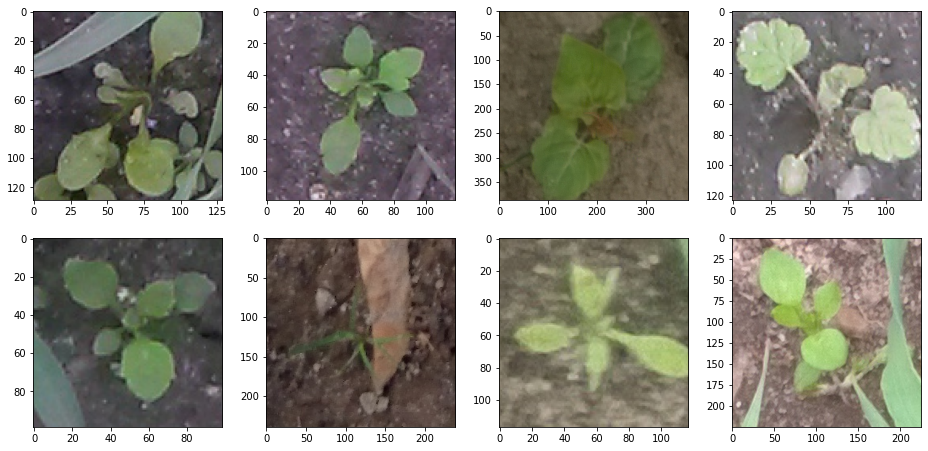

In [11]:
# Representa un ejemplo de las imágenes que se van a tomar para resolver el problema. En este caso se representarán las de dos hojas

# presentaremos images en una configuración de 4x4
nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_weed_pix = [os.path.join(train_weed_5_6_dir, fname) 
                for fname in train_weed_5_6_fnames[ pic_index-8:pic_index] 
               ]

for i, img_path in enumerate(next_weed_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

In [19]:
#Creación de la CNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 256)      

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [22]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255.,
      rotation_range=60,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [23]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 2952 images belonging to 6 classes.
Found 366 images belonging to 6 classes.
Found 372 images belonging to 6 classes.


In [24]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

147
18


In [25]:
history = model.fit(
    train_generator, 
    steps_per_epoch= steps_per_epoch,
    epochs=150,
    validation_data=validation_generator,
    validation_steps= validation_steps,
    verbose=1)

Epoch 1/150
147/147 [==============================] - 32s 209ms/step - loss: 1.7891 - accuracy: 0.1739 - val_loss: 1.7870 - val_accuracy: 0.1667
Epoch 2/150
147/147 [==============================] - 23s 154ms/step - loss: 1.7836 - accuracy: 0.1937 - val_loss: 1.7799 - val_accuracy: 0.1861
Epoch 3/150
147/147 [==============================] - 23s 159ms/step - loss: 1.7753 - accuracy: 0.2026 - val_loss: 1.7681 - val_accuracy: 0.2028
Epoch 4/150
147/147 [==============================] - 23s 158ms/step - loss: 1.7579 - accuracy: 0.2466 - val_loss: 1.7507 - val_accuracy: 0.2750
Epoch 5/150
147/147 [==============================] - 24s 162ms/step - loss: 1.7267 - accuracy: 0.2793 - val_loss: 1.6914 - val_accuracy: 0.3222
Epoch 6/150
147/147 [==============================] - 23s 154ms/step - loss: 1.6803 - accuracy: 0.3046 - val_loss: 1.7638 - val_accuracy: 0.2083
Epoch 7/150
147/147 [==============================] - 22s 151ms/step - loss: 1.6334 - accuracy: 0.3281 - val_loss: 1.6059 -

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

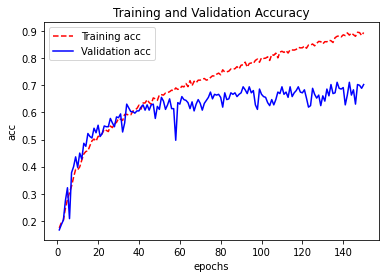

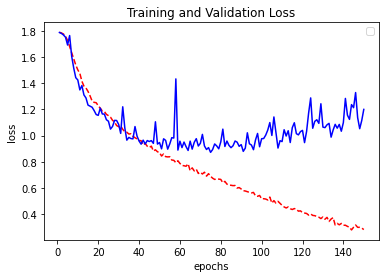

<Figure size 432x288 with 0 Axes>

In [26]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [27]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

19/19 [==============================] - 2s 109ms/step - loss: 1.3498 - accuracy: 0.6640
Test Accuracy: 0.6639785170555115


In [28]:
# Guardar modelo
model.save('CH_V_6hojas.h5')

In [13]:
# Cargar modelo entrenado
model = tf.keras.models.load_model('CH_V_6hojas.h5')